In [1]:
import numpy as np
from utils import *
from matplotlib import pyplot as plt
import matplotlib.patches as patches
tf.set_random_seed(777)
%matplotlib inline

In [2]:
tmp = np.load('/data1/jerry/project/emotion/data/data.npz')
img = tmp['img']
lab = tmp['lab']

for i in range(3):
    seq = np.random.choice(len(img), len(img), replace=False)
    img = img[seq]
    lab = lab[seq]


print(img.shape)
print(lab.shape)

(246, 960, 720, 3)
(246, 4)


In [3]:
X = tf.placeholder(tf.float32, shape=[None, 960, 720, 3])
Y = tf.placeholder(tf.float32, shape=[None, 4])

In [4]:
def model(x, w, b):
    
    # 960, 720
    l1 = tf.nn.relu(conv2d(x, w['w1']) + b['b1'])
    
    #320, 240
    l2 = max_pool_2d(l1, ksize=[1,3,3,1], strides=[1,3,3,1])
    l2 = tf.nn.relu(conv2d(l2, w['w2']) + b['b2'])
    
    #160, 120
    l3 = max_pool_2d(l2)
    l3 = tf.nn.relu(conv2d(l3, w['w3']) + b['b3'])
    
    #80, 60
    l4 = max_pool_2d(l3)
    l4 = tf.nn.relu(conv2d(l4, w['w4']) + b['b4'])
    
    #40, 30
    l5 = max_pool_2d(l4)
    l5 = tf.nn.relu(conv2d(l5, w['w5']) + b['b5'])
    
    #20, 15
    l6 = max_pool_2d(l5)
    l6 = tf.nn.relu(conv2d(l6, w['w6']) + b['b6'])
    
    l7 = tf.reshape(l6, [-1, 20*15*512])
    l7 = tf.nn.relu(tf.nn.xw_plus_b(l7, w['w7'], b['b7']))
    
    l8 = tf.nn.xw_plus_b(l7, w['w8'], b['b8'])
    
    return l8

In [5]:
weights = {
    'w1':init_w('w1', [11, 11, 3, 16]),
    'w2':init_w('w2', [7, 7, 16, 32]),
    'w3':init_w('w3', [3, 3, 32, 64]),
    'w4':init_w('w4', [3, 3, 64, 128]),
    'w5':init_w('w5', [3, 3, 128, 256]),
    'w6':init_w('w6', [3, 3, 256, 512]),
    'w7':init_w('w7', [20*15*512, 1000]),
    'w8':init_w('w8', [1000, 4])
}

biases = {
    'b1':init_b('b1', 16),
    'b2':init_b('b2', 32),
    'b3':init_b('b3', 64),
    'b4':init_b('b4', 128),
    'b5':init_b('b5', 256),
    'b6':init_b('b6', 512),
    'b7':init_b('b7', 1000),
    'b8':init_b('b8', 4)
}

In [6]:
pred = model(X, weights, biases)
cost = tf.reduce_mean(tf.square(pred - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=1e-8).minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
epochs = 1000
batch_size = 50
tot_batch = np.round(len(img)/batch_size)
for epoch in range(epochs):
    epoch_cost = 0.
    print("Epoch : %d/%d"%(epoch+1, epochs))
    for i in range(int(tot_batch)):
        batch_seq = np.random.choice(len(img), batch_size, replace=False)
        batch_x = img[batch_seq]
        batch_y = lab[batch_seq]

        sess.run(train, feed_dict = {X:batch_x, Y:batch_y})
        batch_cost = sess.run(cost, feed_dict = {X:batch_x, Y:batch_y})
        epoch_cost += batch_cost
        #print("Batch_cost : %f"%(batch_cost))
    print("Cost : %f"%(epoch_cost/tot_batch))
    print("------------------------------------")

Epoch : 1/1000
Cost : 1944.305371
------------------------------------
Epoch : 2/1000
Cost : 1506.675708
------------------------------------
Epoch : 3/1000
Cost : 1518.748535
------------------------------------
Epoch : 4/1000
Cost : 1671.495923
------------------------------------
Epoch : 5/1000
Cost : 1692.828638
------------------------------------
Epoch : 6/1000
Cost : 1605.555908
------------------------------------
Epoch : 7/1000
Cost : 1412.768445
------------------------------------
Epoch : 8/1000
Cost : 1547.248926
------------------------------------
Epoch : 9/1000
Cost : 1260.758740
------------------------------------
Epoch : 10/1000
Cost : 1576.570581
------------------------------------
Epoch : 11/1000
Cost : 1749.982324
------------------------------------
Epoch : 12/1000
Cost : 1753.975537
------------------------------------
Epoch : 13/1000
Cost : 1576.716431
------------------------------------
Epoch : 14/1000
Cost : 1264.918848
------------------------------------
E

Cost : 1029.420227
------------------------------------
Epoch : 116/1000
Cost : 848.439587
------------------------------------
Epoch : 117/1000
Cost : 892.089502
------------------------------------
Epoch : 118/1000
Cost : 895.296875
------------------------------------
Epoch : 119/1000
Cost : 934.589404
------------------------------------
Epoch : 120/1000
Cost : 702.059290
------------------------------------
Epoch : 121/1000
Cost : 1027.835315
------------------------------------
Epoch : 122/1000
Cost : 686.897510
------------------------------------
Epoch : 123/1000
Cost : 893.639075
------------------------------------
Epoch : 124/1000
Cost : 659.375732
------------------------------------
Epoch : 125/1000
Cost : 780.936353
------------------------------------
Epoch : 126/1000
Cost : 997.185547
------------------------------------
Epoch : 127/1000
Cost : 640.570587
------------------------------------
Epoch : 128/1000
Cost : 815.953259
------------------------------------
Epoch :

Cost : 559.164496
------------------------------------
Epoch : 230/1000
Cost : 566.314844
------------------------------------
Epoch : 231/1000
Cost : 531.692767
------------------------------------
Epoch : 232/1000
Cost : 561.547919
------------------------------------
Epoch : 233/1000
Cost : 665.580725
------------------------------------
Epoch : 234/1000
Cost : 416.541101
------------------------------------
Epoch : 235/1000
Cost : 493.936926
------------------------------------
Epoch : 236/1000
Cost : 507.932288
------------------------------------
Epoch : 237/1000
Cost : 470.377704
------------------------------------
Epoch : 238/1000
Cost : 518.501971
------------------------------------
Epoch : 239/1000
Cost : 452.033295
------------------------------------
Epoch : 240/1000
Cost : 449.404187
------------------------------------
Epoch : 241/1000
Cost : 597.216797
------------------------------------
Epoch : 242/1000
Cost : 470.368555
------------------------------------
Epoch : 2

Cost : 350.111157
------------------------------------
Epoch : 344/1000
Cost : 393.570215
------------------------------------
Epoch : 345/1000
Cost : 376.559192
------------------------------------
Epoch : 346/1000
Cost : 389.540735
------------------------------------
Epoch : 347/1000
Cost : 427.052875
------------------------------------
Epoch : 348/1000
Cost : 445.744812
------------------------------------
Epoch : 349/1000
Cost : 330.886398
------------------------------------
Epoch : 350/1000
Cost : 396.192224
------------------------------------
Epoch : 351/1000
Cost : 423.693439
------------------------------------
Epoch : 352/1000
Cost : 360.741766
------------------------------------
Epoch : 353/1000
Cost : 405.357355
------------------------------------
Epoch : 354/1000
Cost : 430.499551
------------------------------------
Epoch : 355/1000
Cost : 341.153326
------------------------------------
Epoch : 356/1000
Cost : 407.607300
------------------------------------
Epoch : 3

Cost : 278.683212
------------------------------------
Epoch : 458/1000
Cost : 300.849899
------------------------------------
Epoch : 459/1000
Cost : 282.536450
------------------------------------
Epoch : 460/1000
Cost : 313.453421
------------------------------------
Epoch : 461/1000
Cost : 308.546060
------------------------------------
Epoch : 462/1000
Cost : 363.158441
------------------------------------
Epoch : 463/1000
Cost : 299.704391
------------------------------------
Epoch : 464/1000
Cost : 357.990097
------------------------------------
Epoch : 465/1000
Cost : 347.930020
------------------------------------
Epoch : 466/1000
Cost : 274.117065
------------------------------------
Epoch : 467/1000
Cost : 315.654376
------------------------------------
Epoch : 468/1000
Cost : 238.164450
------------------------------------
Epoch : 469/1000
Cost : 377.246344
------------------------------------
Epoch : 470/1000
Cost : 329.481104
------------------------------------
Epoch : 4

Cost : 220.311276
------------------------------------
Epoch : 572/1000
Cost : 239.026413
------------------------------------
Epoch : 573/1000
Cost : 275.264871
------------------------------------
Epoch : 574/1000
Cost : 233.228525
------------------------------------
Epoch : 575/1000
Cost : 227.038663
------------------------------------
Epoch : 576/1000
Cost : 280.551749
------------------------------------
Epoch : 577/1000
Cost : 277.291690
------------------------------------
Epoch : 578/1000
Cost : 273.297131
------------------------------------
Epoch : 579/1000
Cost : 251.711366
------------------------------------
Epoch : 580/1000
Cost : 257.335461
------------------------------------
Epoch : 581/1000
Cost : 264.113504
------------------------------------
Epoch : 582/1000
Cost : 173.574091
------------------------------------
Epoch : 583/1000
Cost : 332.196283
------------------------------------
Epoch : 584/1000
Cost : 272.097598
------------------------------------
Epoch : 5

Cost : 238.780615
------------------------------------
Epoch : 686/1000
Cost : 230.932053
------------------------------------
Epoch : 687/1000
Cost : 282.530927
------------------------------------
Epoch : 688/1000
Cost : 369.462122
------------------------------------
Epoch : 689/1000
Cost : 280.743262
------------------------------------
Epoch : 690/1000
Cost : 223.758972
------------------------------------
Epoch : 691/1000
Cost : 292.457880
------------------------------------
Epoch : 692/1000
Cost : 200.385464
------------------------------------
Epoch : 693/1000
Cost : 258.583960
------------------------------------
Epoch : 694/1000
Cost : 188.093900
------------------------------------
Epoch : 695/1000
Cost : 219.205887
------------------------------------
Epoch : 696/1000
Cost : 185.769754
------------------------------------
Epoch : 697/1000
Cost : 235.536249
------------------------------------
Epoch : 698/1000
Cost : 219.194272
------------------------------------
Epoch : 6

Cost : 365.542035
------------------------------------
Epoch : 800/1000
Cost : 263.187814
------------------------------------
Epoch : 801/1000
Cost : 193.898294
------------------------------------
Epoch : 802/1000
Cost : 273.414969
------------------------------------
Epoch : 803/1000
Cost : 381.341974
------------------------------------
Epoch : 804/1000
Cost : 359.343048
------------------------------------
Epoch : 805/1000
Cost : 255.894876
------------------------------------
Epoch : 806/1000
Cost : 153.799304
------------------------------------
Epoch : 807/1000
Cost : 188.319440
------------------------------------
Epoch : 808/1000
Cost : 188.537640
------------------------------------
Epoch : 809/1000
Cost : 234.373068
------------------------------------
Epoch : 810/1000
Cost : 234.694119
------------------------------------
Epoch : 811/1000
Cost : 174.054189
------------------------------------
Epoch : 812/1000
Cost : 265.128775
------------------------------------
Epoch : 8

Cost : 173.910706
------------------------------------
Epoch : 914/1000
Cost : 247.316818
------------------------------------
Epoch : 915/1000
Cost : 252.326736
------------------------------------
Epoch : 916/1000
Cost : 296.198270
------------------------------------
Epoch : 917/1000
Cost : 397.778174
------------------------------------
Epoch : 918/1000
Cost : 543.521027
------------------------------------
Epoch : 919/1000
Cost : 572.590369
------------------------------------
Epoch : 920/1000
Cost : 371.446613
------------------------------------
Epoch : 921/1000
Cost : 319.900592
------------------------------------
Epoch : 922/1000
Cost : 204.371378
------------------------------------
Epoch : 923/1000
Cost : 159.635725
------------------------------------
Epoch : 924/1000
Cost : 139.889885
------------------------------------
Epoch : 925/1000
Cost : 186.809412
------------------------------------
Epoch : 926/1000
Cost : 179.514107
------------------------------------
Epoch : 9

In [24]:
    test_img = cv2.imread('/data1/jerry/project/emotion/data/moore.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img,(720, 960))

In [25]:
test = sess.run(pred, feed_dict={X:np.expand_dims(test_img, 0)})

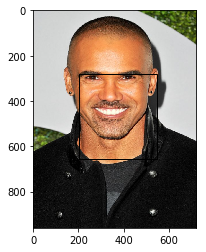

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(test_img)
ax.add_patch(patches.Rectangle((int(test[0,0]), int(test[0,1])), int(test[0,2]), int(test[0,3]), fill=None))
plt.show()

In [29]:
saver = tf.train.Saver()
saver.save(sess, '/data1/jerry/project/emotion/checkpoint/1000')

'/data1/jerry/project/emotion/checkpoint/1000'